# Modules

In [0]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Functions

In [0]:
# load train and test dataset
def load_dataset():

    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()

    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY

In [0]:
# scale pixels
def prep_pixels(train, test):

    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0

    # return normalized images
    return train_norm, test_norm

In [0]:
# define cnn model
def define_model():

    model = Sequential()

    # 3-block vgg style architecture
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # example output part of the model
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(history):

    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')

    pyplot.show()

    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')

    pyplot.close()

In [0]:
# run the test harness for evaluating a model
def run_test_harness(epochs=100, piece=5000):
    
    # load dataset
    trainX, trainY, testX, testY = load_dataset()

    # slicing the dataset
    trainX, trainY, testX, testY = trainX[:piece], trainY[:piece], testX[:piece], testY[:piece]

    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)

    # define model
    model = define_model()

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=0)

    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)

    print('> %.3f' % (acc * 100.0))
    # learning curves

    summarize_diagnostics(history)

# Tests

> 74.250


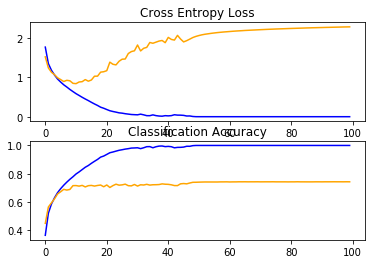

CPU times: user 19min 36s, sys: 5min 9s, total: 24min 45s
Wall time: 25min 42s


In [23]:
%%time

# entry point, run the test harness
run_test_harness(epochs=100, piece=50000)

# Dev

## 1st set

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=1, piece=1000)

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=10, piece=1000)

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=100, piece=1000)

## 2nd set

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=1, piece=5000)

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=10, piece=5000)

In [0]:
%%time

# entry point, run the test harness
run_test_harness(epochs=100, piece=5000)

## 3rd set